In [10]:
#Imports the important libraries
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import yfinance as yf
import pandas as pd
import statsmodels.api as sm
from datetime import datetime
import yfinance as yf
yf.pdr_override()

In [11]:
#Reading the data from the source yahoo finance with the starting data of 1 january 1995
Ticker = wb.DataReader('AMZN', start='2022-8-23')
Ticker2 = wb.DataReader('^GSPC', start='2022-8-23')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [12]:
#Prints the top 5 values
Ticker.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-23 00:00:00-04:00,133.410004,134.990005,132.949997,133.619995,133.619995,36252100
2022-08-24 00:00:00-04:00,132.750000,135.470001,132.100006,133.800003,133.800003,38627000
2022-08-25 00:00:00-04:00,135.259995,137.419998,134.279999,137.279999,137.279999,37496300
2022-08-26 00:00:00-04:00,136.550003,137.830002,130.500000,130.750000,130.750000,53322700
2022-08-29 00:00:00-04:00,129.899994,131.949997,128.770004,129.789993,129.789993,48101600


In [13]:
Ticker2.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-23 00:00:00-04:00,4133.089844,4159.770020,4124.029785,4128.729980,4128.729980,3823520000
2022-08-24 00:00:00-04:00,4126.549805,4156.560059,4119.970215,4140.770020,4140.770020,3583630000
2022-08-25 00:00:00-04:00,4153.259766,4200.540039,4147.589844,4199.120117,4199.120117,3566870000
2022-08-26 00:00:00-04:00,4198.740234,4203.040039,4057.659912,4057.659912,4057.659912,3832750000
2022-08-29 00:00:00-04:00,4034.580078,4062.989990,4017.419922,4030.610107,4030.610107,3396510000


In [14]:
#Prints the bottom 5 values
Ticker.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-08 00:00:00-05:00,102.040001,102.669998,98.779999,100.050003,100.050003,75878300
2023-02-09 00:00:00-05:00,101.320000,101.779999,97.570000,98.239998,98.239998,64622500
2023-02-10 00:00:00-05:00,97.559998,98.820000,96.230003,97.610001,97.610001,52698600
2023-02-13 00:00:00-05:00,97.849998,99.680000,96.910004,99.540001,99.540001,52841500
2023-02-14 00:00:00-05:00,98.410004,100.919998,97.519997,99.699997,99.699997,56128800


In [15]:
Ticker2.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-23 00:00:00-04:00,4133.089844,4159.770020,4124.029785,4128.729980,4128.729980,3823520000
2022-08-24 00:00:00-04:00,4126.549805,4156.560059,4119.970215,4140.770020,4140.770020,3583630000
2022-08-25 00:00:00-04:00,4153.259766,4200.540039,4147.589844,4199.120117,4199.120117,3566870000
2022-08-26 00:00:00-04:00,4198.740234,4203.040039,4057.659912,4057.659912,4057.659912,3832750000
2022-08-29 00:00:00-04:00,4034.580078,4062.989990,4017.419922,4030.610107,4030.610107,3396510000


In [16]:
X = Ticker2['Adj Close'].pct_change().values
Y = Ticker['Adj Close'].pct_change().values

PctX = np.delete(X,0)
PctY = np.delete(Y,0)

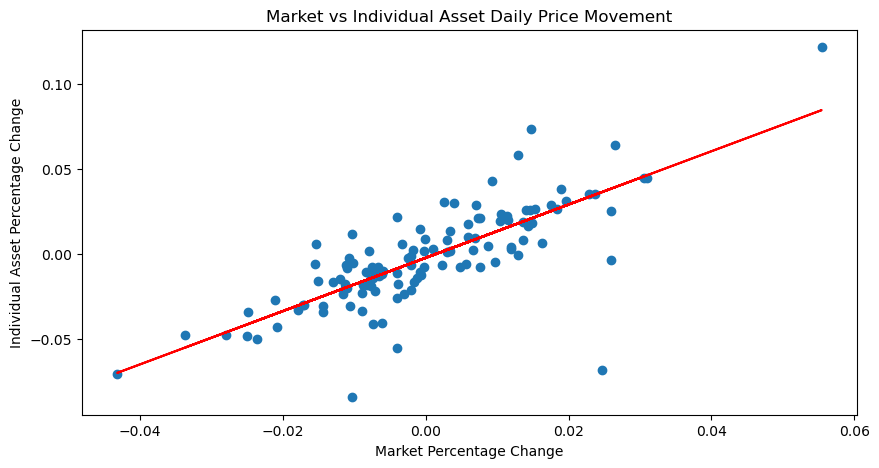

In [17]:
theta = np.polyfit(PctX, PctY, 1)
y_line = theta[1] + theta[0] * PctX

plt.figure(figsize=(10, 5))
plt.scatter(PctX,PctY)
plt.plot(PctX, y_line, 'r')
plt.title("Market vs Individual Asset Daily Price Movement")
plt.xlabel('Market Percentage Change')
plt.ylabel('Individual Asset Percentage Change')
plt.show()

In [18]:
X1 = sm.add_constant(PctX)
reg = sm.OLS(PctY,X1).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     178.5
Date:                Wed, 15 Feb 2023   Prob (F-statistic):           2.32e-25
Time:                        08:17:38   Log-Likelihood:                 308.41
No. Observations:                 120   AIC:                            -612.8
Df Residuals:                     118   BIC:                            -607.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0022      0.002     -1.289      0.200      -0.006       0.001
x1             1.5682      0.117     13.360      0.000       1.336       1.801
==============================================================================
Omnibus:                       62.982   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              436.226
Skew:                          -1.594   Prob(JB):                     1.88e-95
Kurtosis:                      11.779   Cond. No.                         68.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""